In [2]:
import numpy as np
import pandas as pd

Функция ниже собирает параметры для сводных таблиц, а так же витрине.

In [3]:
def pivot_create_function(df, column_name = "МесяцДатыЗаказа"): 
    columns_l = [column_name, 'Выручка', 'Абсолютная маржа', 'Маржа', 'Средняя маржа', 'Средний чек', 'Кол-во чеков', 'Кол-во товаров',
                 'Среднее кол-во товаров в  чеке', 'Кол-во уникальных клиентов', 'Ценность клиента']
    
    unique_values = df[column_name].unique()
    final_df =  pd.DataFrame(columns=columns_l)
    for val in unique_values:
        list_of_values = [val] 
        filtered_df = df[df[column_name] == val]

        profit = int(round(filtered_df['СуммаСтроки'].sum()))
        list_of_values.append(profit)
        
        absmargin = int(round(filtered_df['Маржа'].sum()))
        list_of_values.append(absmargin)
        margin = absmargin/profit                                                
        list_of_values.append(margin)

        df_numb_check = filtered_df['НомерЗаказаНаСайте'].unique()
        numb_check = df_numb_check.size                           
        absmargin = int(round(filtered_df['Маржа'].sum()))
        list_of_values.append(absmargin/numb_check) 
        avarage_bill = int(round(
            filtered_df.groupby(['НомерЗаказаНаСайте']).mean()['СуммаЗаказаНаСайте'].mean()))
        list_of_values.append(avarage_bill)
        list_of_values.append(numb_check)
        
        numb_good = filtered_df['МесяцДатыЗаказа'].size
        list_of_values.append(numb_good)
        avarage_numb_good = int(round(
            filtered_df.groupby(['НомерЗаказаНаСайте']).count()['СуммаЗаказаНаСайте'].mean()))
        list_of_values.append(avarage_numb_good)
        num_of_customers = filtered_df['Телефон_new'].unique().size
        list_of_values.append(num_of_customers)
        
        value_of_customer = int(round(absmargin /num_of_customers))
        list_of_values.append(value_of_customer)
        tmp_df = pd.DataFrame([list_of_values], columns=columns_list) 
        final_df = final_df.append(tmp_df, ignore_index=True)
    return final_df

### Достаем таблицы по всем заказам и по выкупленным с чисткой.

In [4]:
df_all_orders = pd.read_csv('df_all_orders.csv', sep=';')
df_buyed_orders = pd.read_csv('df_buyed_orders.csv', sep=';')

### Добавляем к таблицам дни недели и время для сводных таблиц.

In [5]:
dates_all = pd.to_datetime(df_all_orders['Дата'])
df_all_orders['ДеньНедели'] = dates_all.dt.weekday_name
df_all_orders['ВремяОкругл'] = dates_all.dt.hour

dates_buyed = pd.to_datetime(df_buyed_orders['Дата'])
df_buyed_orders['ДеньНедели'] = dates_buyed.dt.weekday_name
df_buyed_orders['ВремяОкругл'] = dates_buyed.dt.hour

In [6]:
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Monday', 'ДеньНедели'] = 'Понедельник'
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Tuesday', 'ДеньНедели'] = 'Вторник'
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Wednesday', 'ДеньНедели'] = 'Среда'
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Thursday', 'ДеньНедели'] = 'Четверг'
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Friday', 'ДеньНедели'] = 'Пятница'
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Saturday', 'ДеньНедели'] = 'Суббота'
df_all_orders.loc[df_all_orders['ДеньНедели'] == 'Sunday', 'ДеньНедели'] = 'Воскресенье'

df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Monday', 'ДеньНедели'] = 'Понедельник'
df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Tuesday', 'ДеньНедели'] = 'Вторник'
df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Wednesday', 'ДеньНедели'] = 'Среда'
df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Thursday', 'ДеньНедели'] = 'Четверг'
df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Friday', 'ДеньНедели'] = 'Пятница'
df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Saturday', 'ДеньНедели'] = 'Суббота'
df_buyed_orders.loc[df_buyed_orders['ДеньНедели'] == 'Sunday', 'ДеньНедели'] = 'Воскресенье'

In [7]:
print(df_all_orders.shape)
print(df_buyed_orders.shape)

(431200, 40)
(215876, 40)


In [7]:
# Сохраним
df_all_orders.to_csv('df_all_orders_new.csv', index=False, sep=';', encoding='utf-8-sig')
df_buyed_orders.to_csv('df_buyed_orders_new.csv', index=False, sep=';', encoding='utf-8-sig')

### Сводные таблицы по всем заказам.

In [46]:
pivot_Month = pivot_create_function(df_all_orders, column_name='МесяцДатыЗаказа')
pivot_Group2 = pivot_create_function(df_all_orders, column_name='Группа2')
pivot_CityShop = pivot_create_function(df_all_orders, column_name='ГородМагазина')
pivot_Geo = pivot_create_function(df_all_orders, column_name='Гео')
pivot_Delivery = pivot_create_function(df_all_orders, column_name='МетодДоставки')
pivot_Payment = pivot_create_function(df_all_orders, column_name='ФормаОплаты')
pivot_DayOfWeek = pivot_create_function(df_all_orders, column_name='ДеньНедели')
pivot_Time = pivot_create_function(df_all_orders, column_name='ВремяОкругл')

In [47]:
pivot_Month.sort_values('Выручка', ascending = False)

,МесяцДатыЗаказа,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,3,203987075,66211323,0.324586,997.413841,3367,66383,213196,3,52995,1249
1,4,193096056,64649746,0.334806,1008.623586,3316,64097,218004,3,50695,1275


In [48]:
pivot_Group2.sort_values('Выручка', ascending = False)

,Группа2,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,КРУПНОГАБАРИТНЫЙ ТОВАР,138654014,43138521,0.311123,1875.017212,6944,23007,26697,1,20856,2068
6,ПОДГУЗНИКИ,64993978,19123084,0.294229,565.437138,3083,33820,46294,1,24429,783
2,ИГРУШКИ,59885282,14225993,0.237554,362.233417,2681,39273,86324,2,33364,426
1,"ТЕКСТИЛЬ, ТРИКОТАЖ",49633293,17653538,0.355679,692.512867,3665,25492,68056,3,19734,895
10,ДЕТСКОЕ ПИТАНИЕ,38918185,24182962,0.621379,1112.781244,3195,21732,101030,5,14455,1673
4,ОБУВЬ,15027404,5243740,0.348945,594.056871,3516,8827,12813,1,7558,694
7,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,12931344,2644120,0.204474,202.335476,3424,13068,24631,2,11278,234
8,КОСМЕТИКА/ГИГИЕНА,9288236,2743716,0.295397,182.950990,3377,14997,39242,3,12061,227
3,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",3846084,1000182,0.260052,145.143230,2839,6891,18831,3,6129,163
11,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,3466642,730072,0.210599,322.327594,2805,2265,5626,2,1863,392


In [49]:
pivot_CityShop.sort_values('Выручка', ascending = False)

,ГородМагазина,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,ИнтернетДоставка,369529708,121806886,0.329627,953.344233,3187,127768,428177,3,89358,1363
1,Москва,3157118,1136901,0.360107,2835.164589,8259,401,490,1,390,2915
5,Калуга,2648099,891458,0.336641,3623.813008,10828,246,264,1,211,4225
16,Ростов-на-Дону,1802378,577066,0.320169,3872.926174,12727,149,159,1,104,5549
8,Омск,1534189,458890,0.299109,4025.350877,14976,114,127,1,104,4412
...,...,...,...,...,...,...,...,...,...,...,...
53,Клин,79802,23927,0.299830,2658.555556,8867,9,10,1,8,2991
15,Сергиев,59159,15784,0.266806,1753.777778,6573,9,9,1,9,1754
57,Пенза,52515,16787,0.319661,4196.750000,13129,4,4,1,4,4197
58,Стерлитамак,47684,15494,0.324931,2213.428571,6812,7,7,1,7,2213


In [50]:
pivot_Geo.sort_values('Выручка', ascending = False)

,Гео,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
1,Регионы,213872582,66993510,0.313240,958.419313,3284,69900,175480,3,48465,1382
0,Москва,141353854,49939125,0.353292,1064.232818,3399,46925,202158,4,34498,1448
2,МО,41856695,13928434,0.332765,1020.024460,3441,13655,53562,4,9713,1434


In [51]:
pivot_Delivery.sort_values('Выручка', ascending = False)

,МетодДоставки,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
1,Магазины,265451635,80023992,0.301464,924.566358,3376,86553,255742,3,64066,1249
0,Курьерская,75499194,28965066,0.383647,1558.937890,4513,18580,106276,6,14856,1950
5,Самовывоз,35286732,13937265,0.394972,712.757748,1924,19554,47298,2,13633,1022
3,Pick point,9137342,3103435,0.339643,860.630893,2756,3606,10810,3,3192,972
2,DPD,6202182,2083657,0.335955,1755.397641,5875,1187,4549,4,1139,1829
4,Транспортная компания,5506046,2747654,0.499025,2747.654000,5493,1000,6525,7,835,3291


In [52]:
pivot_Payment.sort_values('Выручка', ascending = False)

,ФормаОплаты,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
1,Безналичная,286274546,87951461,0.307228,952.432871,3406,92344,277623,3,68809,1278
0,Наличная,110808585,42909608,0.387241,1125.173275,3186,38136,153577,4,28342,1514


In [53]:
pivot_DayOfWeek.sort_values('Выручка', ascending = False)

,ДеньНедели,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
3,Понедельник,63054047,20791071,0.329734,1016.380084,3373,20456,68628,3,18360,1132
0,Вторник,61227871,20214884,0.330158,1010.441068,3400,20006,65312,3,17933,1127
1,Пятница,59258634,19479416,0.328719,1001.100627,3379,19458,61245,3,17530,1111
2,Суббота,59119965,19577419,0.331147,1017.590259,3341,19239,64667,3,17108,1144
6,Среда,54158888,17748722,0.327716,960.844630,3206,18472,62789,3,16631,1067
4,Четверг,53148180,17051151,0.320823,928.762514,3184,18359,63711,3,16524,1032
5,Воскресенье,47115546,15998407,0.339557,1104.099862,3542,14490,44848,3,13210,1211


In [54]:
pivot_Time.sort_values('Выручка', ascending = False)

,ВремяОкругл,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
9,18,30409111,10009544,0.329163,1049.438457,3483,9538,30570,3,8886,1126
4,14,30084015,9887031,0.328647,1040.302083,3473,9504,31004,3,8886,1113
7,15,30055987,9970161,0.331720,1003.640125,3323,9934,31754,3,9306,1071
1,12,29905635,9992242,0.334126,1073.857281,3517,9305,31004,3,8742,1143
8,16,29342976,9681429,0.329940,1026.118601,3432,9435,31008,3,8804,1100
6,17,29267863,9692706,0.331172,1017.286524,3376,9528,32707,3,8919,1087
0,11,27965588,9291826,0.332259,1068.763055,3513,8694,29413,3,8175,1137
10,19,26357885,8812267,0.334331,1060.951962,3459,8306,27638,3,7771,1134
3,10,23224844,7590513,0.326827,1019.682026,3403,7444,23002,3,6950,1092
5,13,22953924,7527257,0.327929,1030.848672,3444,7302,24428,3,6885,1093


### Ниже таблица считается очень долго.

In [ ]:
pivot_Phone = generate_table(df_all_orders, column_name='Телефон_new')

### Сохраняем

In [ ]:
pivot_Phone.to_csv('pivot_Phone_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')

In [55]:
pivot_Month.to_csv('pivot_Month_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Group2.to_csv('pivot_Group2_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_CityShop.to_csv('pivot_CityShop_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Geo.to_csv('pivot_Geo_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Delivery.to_csv('pivot_Delivery_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Payment.to_csv('pivot_Payment_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_DayOfWeek.to_csv('pivot_DayOfWeek_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Time.to_csv('pivot_Time_all_orders.csv', index=False, sep=';', encoding='utf-8-sig')

### Сводные таблицы по выкупленным товарам.

In [44]:
pivot_Month = pivot_create_function(df_buyed_orders, column_name='МесяцДатыЗаказа')
pivot_Group2 = pivot_create_function(df_buyed_orders, column_name='Группа2')
pivot_CityShop = pivot_create_function(df_buyed_orders, column_name='ГородМагазина')
pivot_Geo = pivot_create_function(df_buyed_orders, column_name='Гео')
pivot_Delivery = pivot_create_function(df_buyed_orders, column_name='МетодДоставки')
pivot_Payment = pivot_create_function(df_buyed_orders, column_name='ФормаОплаты')
pivot_DayOfWeek = pivot_create_function(df_buyed_orders, column_name='ДеньНедели')
pivot_Time = pivot_create_function(df_buyed_orders, column_name='ВремяОкругл')

In [33]:
pivot_Month.sort_values('Выручка', ascending = False)

,МесяцДатыЗаказа,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
1,4,117733366,36454988,0.309640,948.040153,3150,38453,115736,3,32432,1124
0,3,115221559,33439121,0.290216,900.232090,3212,37145,100140,3,31706,1055


In [34]:
pivot_Group2.sort_values('Выручка', ascending = False)

,Группа2,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
2,КРУПНОГАБАРИТНЫЙ ТОВАР,101678894,30759158,0.302513,1984.589845,7116,15499,17629,1,14258,2157
5,ПОДГУЗНИКИ,35122199,9431073,0.268522,506.366336,2698,18625,25704,1,14349,657
1,ИГРУШКИ,35028032,7942742,0.226754,327.117582,2214,24281,52944,2,21263,374
0,"ТЕКСТИЛЬ, ТРИКОТАЖ",25955589,8750494,0.337133,621.175126,2870,14087,35851,3,11429,766
10,ДЕТСКОЕ ПИТАНИЕ,11039231,6712276,0.608038,965.656165,2954,6951,27822,4,5221,1286
9,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ,7234398,1450956,0.200563,187.631708,2779,7733,14213,2,6933,209
3,ОБУВЬ,7135771,2342251,0.328241,520.268992,2449,4502,6174,1,4005,585
6,КОСМЕТИКА/ГИГИЕНА,4566475,1274706,0.279144,164.925087,2717,7729,19093,2,6579,194
8,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",2504180,644096,0.257208,145.426959,2186,4429,11922,3,4008,161
11,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,2426923,488774,0.201397,300.969212,2211,1624,3619,2,1347,363


In [35]:
pivot_CityShop.sort_values('Выручка', ascending = False)

,ГородМагазина,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,ИнтернетДоставка,209159989,62114412,0.296971,848.163585,2950,73234,213299,3,55919,1111
3,Калуга,2648099,891458,0.336641,3623.813008,10828,246,264,1,211,4225
14,Ростов-на-Дону,1483665,475179,0.320274,3683.558140,11694,129,136,1,94,5055
17,Москва,1450969,502780,0.346513,2371.603774,6905,212,222,1,207,2429
7,Омск,1409911,421376,0.298867,4131.137255,14417,102,115,1,94,4483
...,...,...,...,...,...,...,...,...,...,...,...
36,Мытищи,77343,33535,0.433588,2395.357143,5742,14,15,1,14,2395
13,Сергиев,56912,15042,0.264303,1880.250000,7114,8,8,1,8,1880
56,Пенза,52515,16787,0.319661,4196.750000,13129,4,4,1,4,4197
58,Стерлитамак,47684,15494,0.324931,2213.428571,6812,7,7,1,7,2213


In [36]:
pivot_Geo.sort_values('Выручка', ascending = False)

,Гео,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,Регионы,146478228,42388730,0.289386,1035.589026,3684,40932,99092,2,32492,1305
2,Москва,60274267,19093621,0.316779,757.833737,2483,25195,84878,3,19168,996
1,МО,26202428,8411758,0.321030,888.159434,2858,9471,31906,3,6955,1209


In [37]:
pivot_Delivery.sort_values('Выручка', ascending = False)

,МетодДоставки,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,Магазины,232954924,69894109,0.300033,924.54971,3180,75598,215876,3,58031,1204


In [38]:
pivot_Payment.sort_values('Выручка', ascending = False)

,ФормаОплаты,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
0,Безналичная,232934430,69888574,0.300035,924.488723,3180,75597,215874,3,58030,1204
1,Наличная,20494,5535,0.270079,5535.000000,10247,1,2,2,1,5535


In [39]:
pivot_DayOfWeek.sort_values('Выручка', ascending = False)

,ДеньНедели,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
3,Понедельник,36898832,11119141,0.301341,922.061614,3163,12059,34561,3,11157,997
2,Суббота,35508403,10760804,0.303050,960.614533,3255,11202,32837,3,10344,1040
0,Вторник,34346725,10233800,0.297956,905.005306,3131,11308,31295,3,10534,972
1,Пятница,33406286,10037098,0.300455,939.803184,3256,10680,28885,3,9934,1010
6,Среда,32340224,9607763,0.297084,868.851782,3012,11058,33146,3,10270,936
4,Четверг,32078724,9398226,0.292974,855.550842,3013,10985,33865,3,10212,920
5,Воскресенье,28375732,8737276,0.307914,1051.923429,3520,8306,21287,3,7832,1116


In [40]:
pivot_Time.sort_values('Выручка', ascending = False)

,ВремяОкругл,Выручка,Абсолютная маржа,Маржа,Средняя маржа,Средний чек,Кол-во чеков,Кол-во товаров,Среднее кол-во товаров в чеке,Кол-во уникальных клиентов,Ценность клиента
4,14,17733376,5334875,0.300838,959.509892,3298,5560,15580,3,5301,1006
7,15,17480402,5239906,0.299759,912.557645,3159,5742,15745,3,5501,953
0,12,17475687,5228046,0.299161,987.728320,3393,5293,14858,3,5060,1033
9,18,17450683,5187900,0.297289,972.245127,3375,5336,14182,3,5091,1019
5,17,16697584,5074260,0.303892,943.872768,3214,5376,15704,3,5136,988
8,16,16366949,5028168,0.307215,959.940435,3215,5238,14539,3,5002,1005
1,11,15205033,4554703,0.299552,955.064584,3301,4769,12923,3,4570,997
10,19,15193385,4591157,0.302181,985.226824,3347,4660,13081,3,4464,1028
3,10,14045996,4156267,0.295904,942.250510,3266,4411,11350,3,4202,989
11,20,13123735,3878789,0.295555,870.659708,3028,4455,12458,3,4286,905


In [41]:
pivot_Phone_buyed = generate_table(df_buyed_orders, column_name='Телефон_new')
#58031

### Сохраняем

In [42]:
pivot_Phone_buyed.to_csv('pivot_Phone_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')

In [45]:
pivot_Month.to_csv('pivot_Month_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Group2.to_csv('pivot_Group2_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_CityShop.to_csv('pivot_CityShop_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Geo.to_csv('pivot_Geo_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Delivery.to_csv('pivot_Delivery_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Payment.to_csv('pivot_Payment_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_DayOfWeek.to_csv('pivot_DayOfWeek_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')
pivot_Time.to_csv('pivot_Time_buyed_orders.csv', index=False, sep=';', encoding='utf-8-sig')

# Графики

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
pivot_Month_all = pivot_create_function(df_all_orders, column_name='МесяцДатыЗаказа')
pivot_Group2_all = pivot_create_function(df_all_orders, column_name='Группа2')
pivot_CityShop_all = pivot_create_function(df_all_orders, column_name='ГородМагазина')
pivot_Geo_all = pivot_create_function(df_all_orders, column_name='Гео')
pivot_Delivery_all = pivot_create_function(df_all_orders, column_name='МетодДоставки')
pivot_Payment_all = pivot_create_function(df_all_orders, column_name='ФормаОплаты')
pivot_DayOfWeek_all = pivot_create_function(df_all_orders, column_name='ДеньНедели')
pivot_Time_all = pivot_create_function(df_all_orders, column_name='ВремяОкругл')

In [9]:
pivot_Month_buyed = pivot_create_function(df_buyed_orders, column_name='МесяцДатыЗаказа')
pivot_Group2_buyed = pivot_create_function(df_buyed_orders, column_name='Группа2')
pivot_CityShop_buyed = pivot_create_function(df_buyed_orders, column_name='ГородМагазина')
pivot_Geo_buyed = pivot_create_function(df_buyed_orders, column_name='Гео')
pivot_Delivery_buyed = pivot_create_function(df_buyed_orders, column_name='МетодДоставки')
pivot_Payment_buyed = pivot_create_function(df_buyed_orders, column_name='ФормаОплаты')
pivot_DayOfWeek_buyed = pivot_create_function(df_buyed_orders, column_name='ДеньНедели')
pivot_Time_buyed = pivot_create_function(df_buyed_orders, column_name='ВремяОкругл')

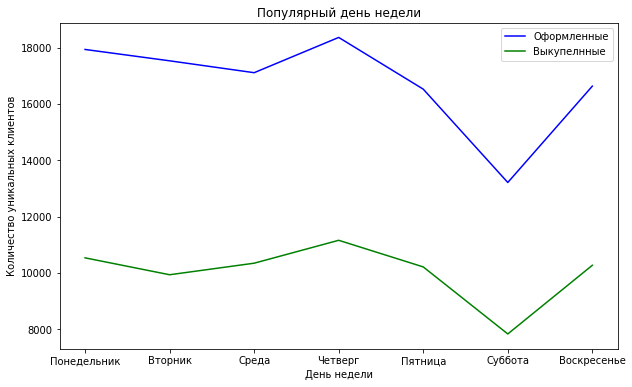

In [42]:
plt.figure(figsize=(10, 6))

plt.plot(pivot_DayOfWeek_all['ДеньНедели'], pivot_DayOfWeek_all['Кол-во уникальных клиентов'], c = 'blue', label = 'Оформленные')
plt.plot(pivot_DayOfWeek_buyed['ДеньНедели'], pivot_DayOfWeek_buyed['Кол-во уникальных клиентов'], c = 'green', label = 'Выкупелнные')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

plt.xticks(ticks, labels)
plt.xlabel('День недели')
plt.ylabel('Количество уникальных клиентов')
plt.title('Популярный день недели')
plt.legend()
plt.show();

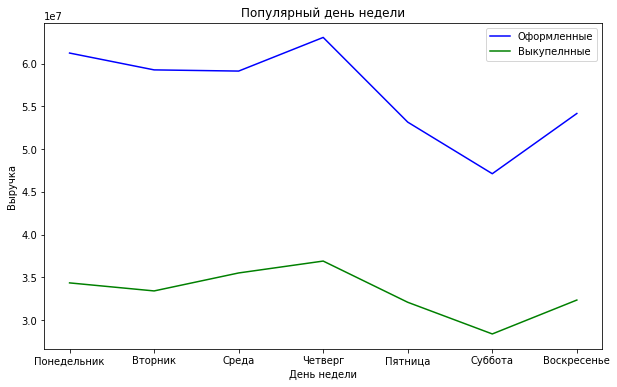

In [43]:
plt.figure(figsize=(10, 6))

plt.plot(pivot_DayOfWeek_all['ДеньНедели'], pivot_DayOfWeek_all['Выручка'], c = 'blue', label = 'Оформленные')
plt.plot(pivot_DayOfWeek_buyed['ДеньНедели'], pivot_DayOfWeek_buyed['Выручка'], c = 'green', label = 'Выкупелнные')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

plt.xticks(ticks, labels)
plt.xlabel('День недели')
plt.ylabel('Выручка')
plt.title('Популярный день недели')
plt.legend()
plt.show();

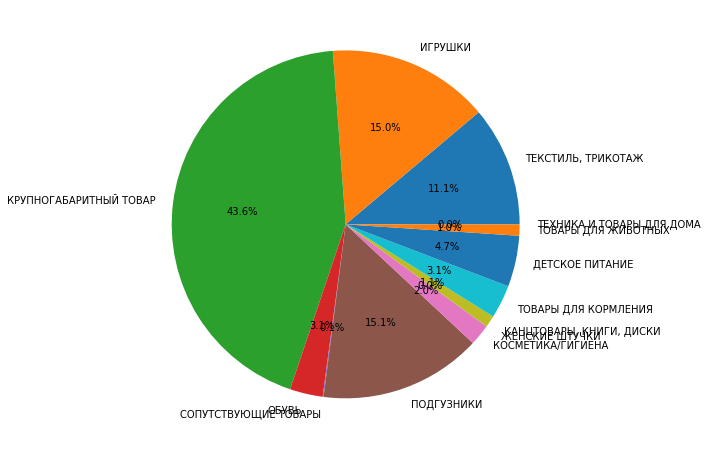

In [68]:
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 10

data = pivot_Group2_buyed['Выручка']
labels = pivot_Group2_buyed['Группа2']

plt.pie(data, labels = labels, autopct = '%1.1f%%')
plt.show()

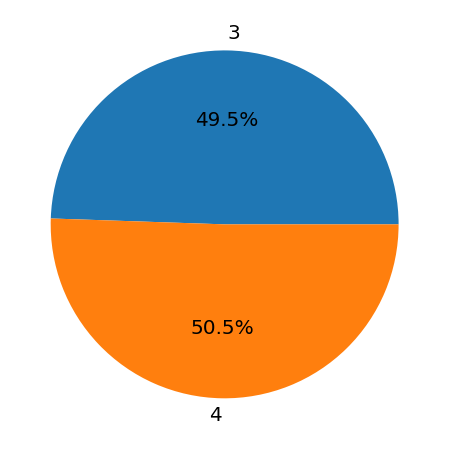

In [70]:
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 20

data = pivot_Month_buyed['Выручка']
labels = pivot_Month_buyed['МесяцДатыЗаказа']

plt.pie(data, labels = labels, autopct = '%1.1f%%')
plt.show()

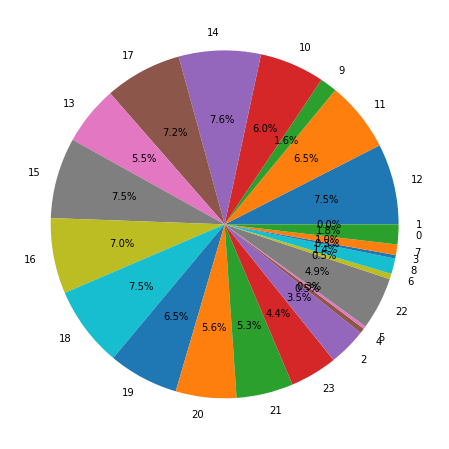

In [72]:
plt.figure(figsize=(8, 8))
plt.rcParams['font.size'] = 10

data = pivot_Time_buyed['Выручка']
labels = pivot_Time_buyed['ВремяОкругл']

plt.pie(data, labels = labels, autopct = '%1.1f%%')
plt.show()